[Telco Customer Churn
](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv)  
Focused customer retention programs

* <b>About</b>: "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

* <b>Data structure</b> :
|Property|Description|
|--------|-----------|
|customerID|Customer ID|
|gender|Whether the customer is a male or a female|
|SeniorCitizen|Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure|Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|



## 데이터 확인 및 전처리

### 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

sns.set_theme()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'AppleGothic'

### 데이터 로드

In [2]:
df = pd.read_csv("https://bit.ly/telco-csv").set_index('customerID')

In [3]:
print(df.shape)
df.head(3)

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# 결측치 없음
df.isnull().sum().sum()

0

In [5]:
# 컬럼별 Dtype 확인 > 'TotelCharges' 컬럼이 object로 되어 있음.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### 전처리

In [6]:
# 'TotalCharges' 컬럼을 수치형으로 변환 > "Unable to parse string " " at position 488"
# errors='coerce' 로 강제로 str형도 numeric으로 변환
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 110.0+ KB


In [7]:
# 'TotalCharges'가 포함된 수치데이터 다시 확인
df.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# 결측치 다시 확인 (' '인 경우 0으로 바꼈을 것이다)
df['TotalCharges'].isnull().sum()

11

In [9]:
# 11 / 7043 은 작은 수이기 때문에 결측치를 그냥 제거
# 0이나 다른 값으로 채워도 되지만 분포가 달라져서 예측에 영향을 줄 수 있음.
df = df.dropna()
print(df.shape)
df.head(3)

(7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## M.L > predict

### 라이브러리 로드

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### train, test 데이터셋 분리

In [11]:
# 수치형 변수만 선택해서 학습
feature_names = df.select_dtypes(include='number').columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [12]:
# 예측할 변수
label_name = 'Churn'
label_name

'Churn'

In [13]:
X = df[feature_names]
y = df[label_name]

print(X.shape, y.shape)
display(X.head(2), y.head(2))

(7032, 4) (7032,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
7590-VHVEG,0,1,29.85,29.85
5575-GNVDE,0,34,56.95,1889.50


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

In [14]:
# train test split을 이용해서 데이터셋 분리
X_train, X_test, y_train, y_test = (train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y))

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


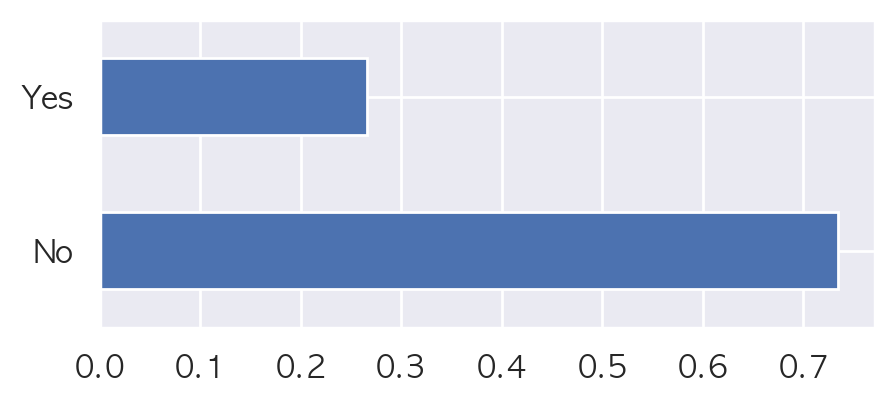

In [15]:
# 전체 데이터셋 df에서 Churn의 0, 1 비율 확인
print(df['Churn'].value_counts(1))
df['Churn'].value_counts(1).plot(kind='barh', figsize=(5,2));

In [16]:
# 분리된 train, test 데이터셋에서 stratify가 적용되었는지 확인 > ok
print(y_train.value_counts(1))

y_test.value_counts(1)

No     0.734222
Yes    0.265778
Name: Churn, dtype: float64


No     0.734186
Yes    0.265814
Name: Churn, dtype: float64

### DecisionTreeClassification

DecisionTreeClassification 은 빠르고, 알고리즘을 시각화해주는 것이 장점이다.
어떤 feature에 따라 어떻게 분류되었는지 쉽게 이해할 수 있다.

#### 예측모델 생성

In [33]:
clf_decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
clf_decisiontree

DecisionTreeClassifier()

#### 예측(y_predict)의  점수 확인

In [34]:
# 방법1) model.score() : 지도학습에만 사용 가능
clf_decisiontree.score(X_test, y_test)

0.7178393745557925

In [36]:
# 방법2) predict로 예측한 데이터와 직접 비교
y_predict = clf_decisiontree.predict(X_test)
(y_predict == y_test).mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of customerID
0604-THJFP     True
4059-IIEBK    False
2228-BZDEE     True
2839-RFSQE    False
5360-LJCNJ    False
              ...  
1600-DILPE     True
0128-MKWSG     True
1179-INLAT     True
3891-NLXJB     True
8957-THMOA     True
Name: Churn, Length: 1407, dtype: bool>

In [37]:
# 방법3) accuracy_score 사용
from sklearn.metrics import accuracy_score

y_predict = clf_decisiontree.predict(X_test)
accuracy_score(y_test, y_predict)

0.7178393745557925

#### 의사결정나무(DecisionTree)의 Tree 시각화

트리 시각화 방법1. sklearn.tree.plot_tree()

* filled : True로 설정하면 노드마다 색칠해서 표현
* feature_names : 지정해주지 않으면 x[1], x[2] 등으로 표현 > 우리의 원래 변수명으로 지정.
* class_names : target class의 이름
* max_depth : 트리 모델의 하이퍼파라미터가 아니라 plot_tree에서의 최대깊이 (빨리 그리기 위해서)


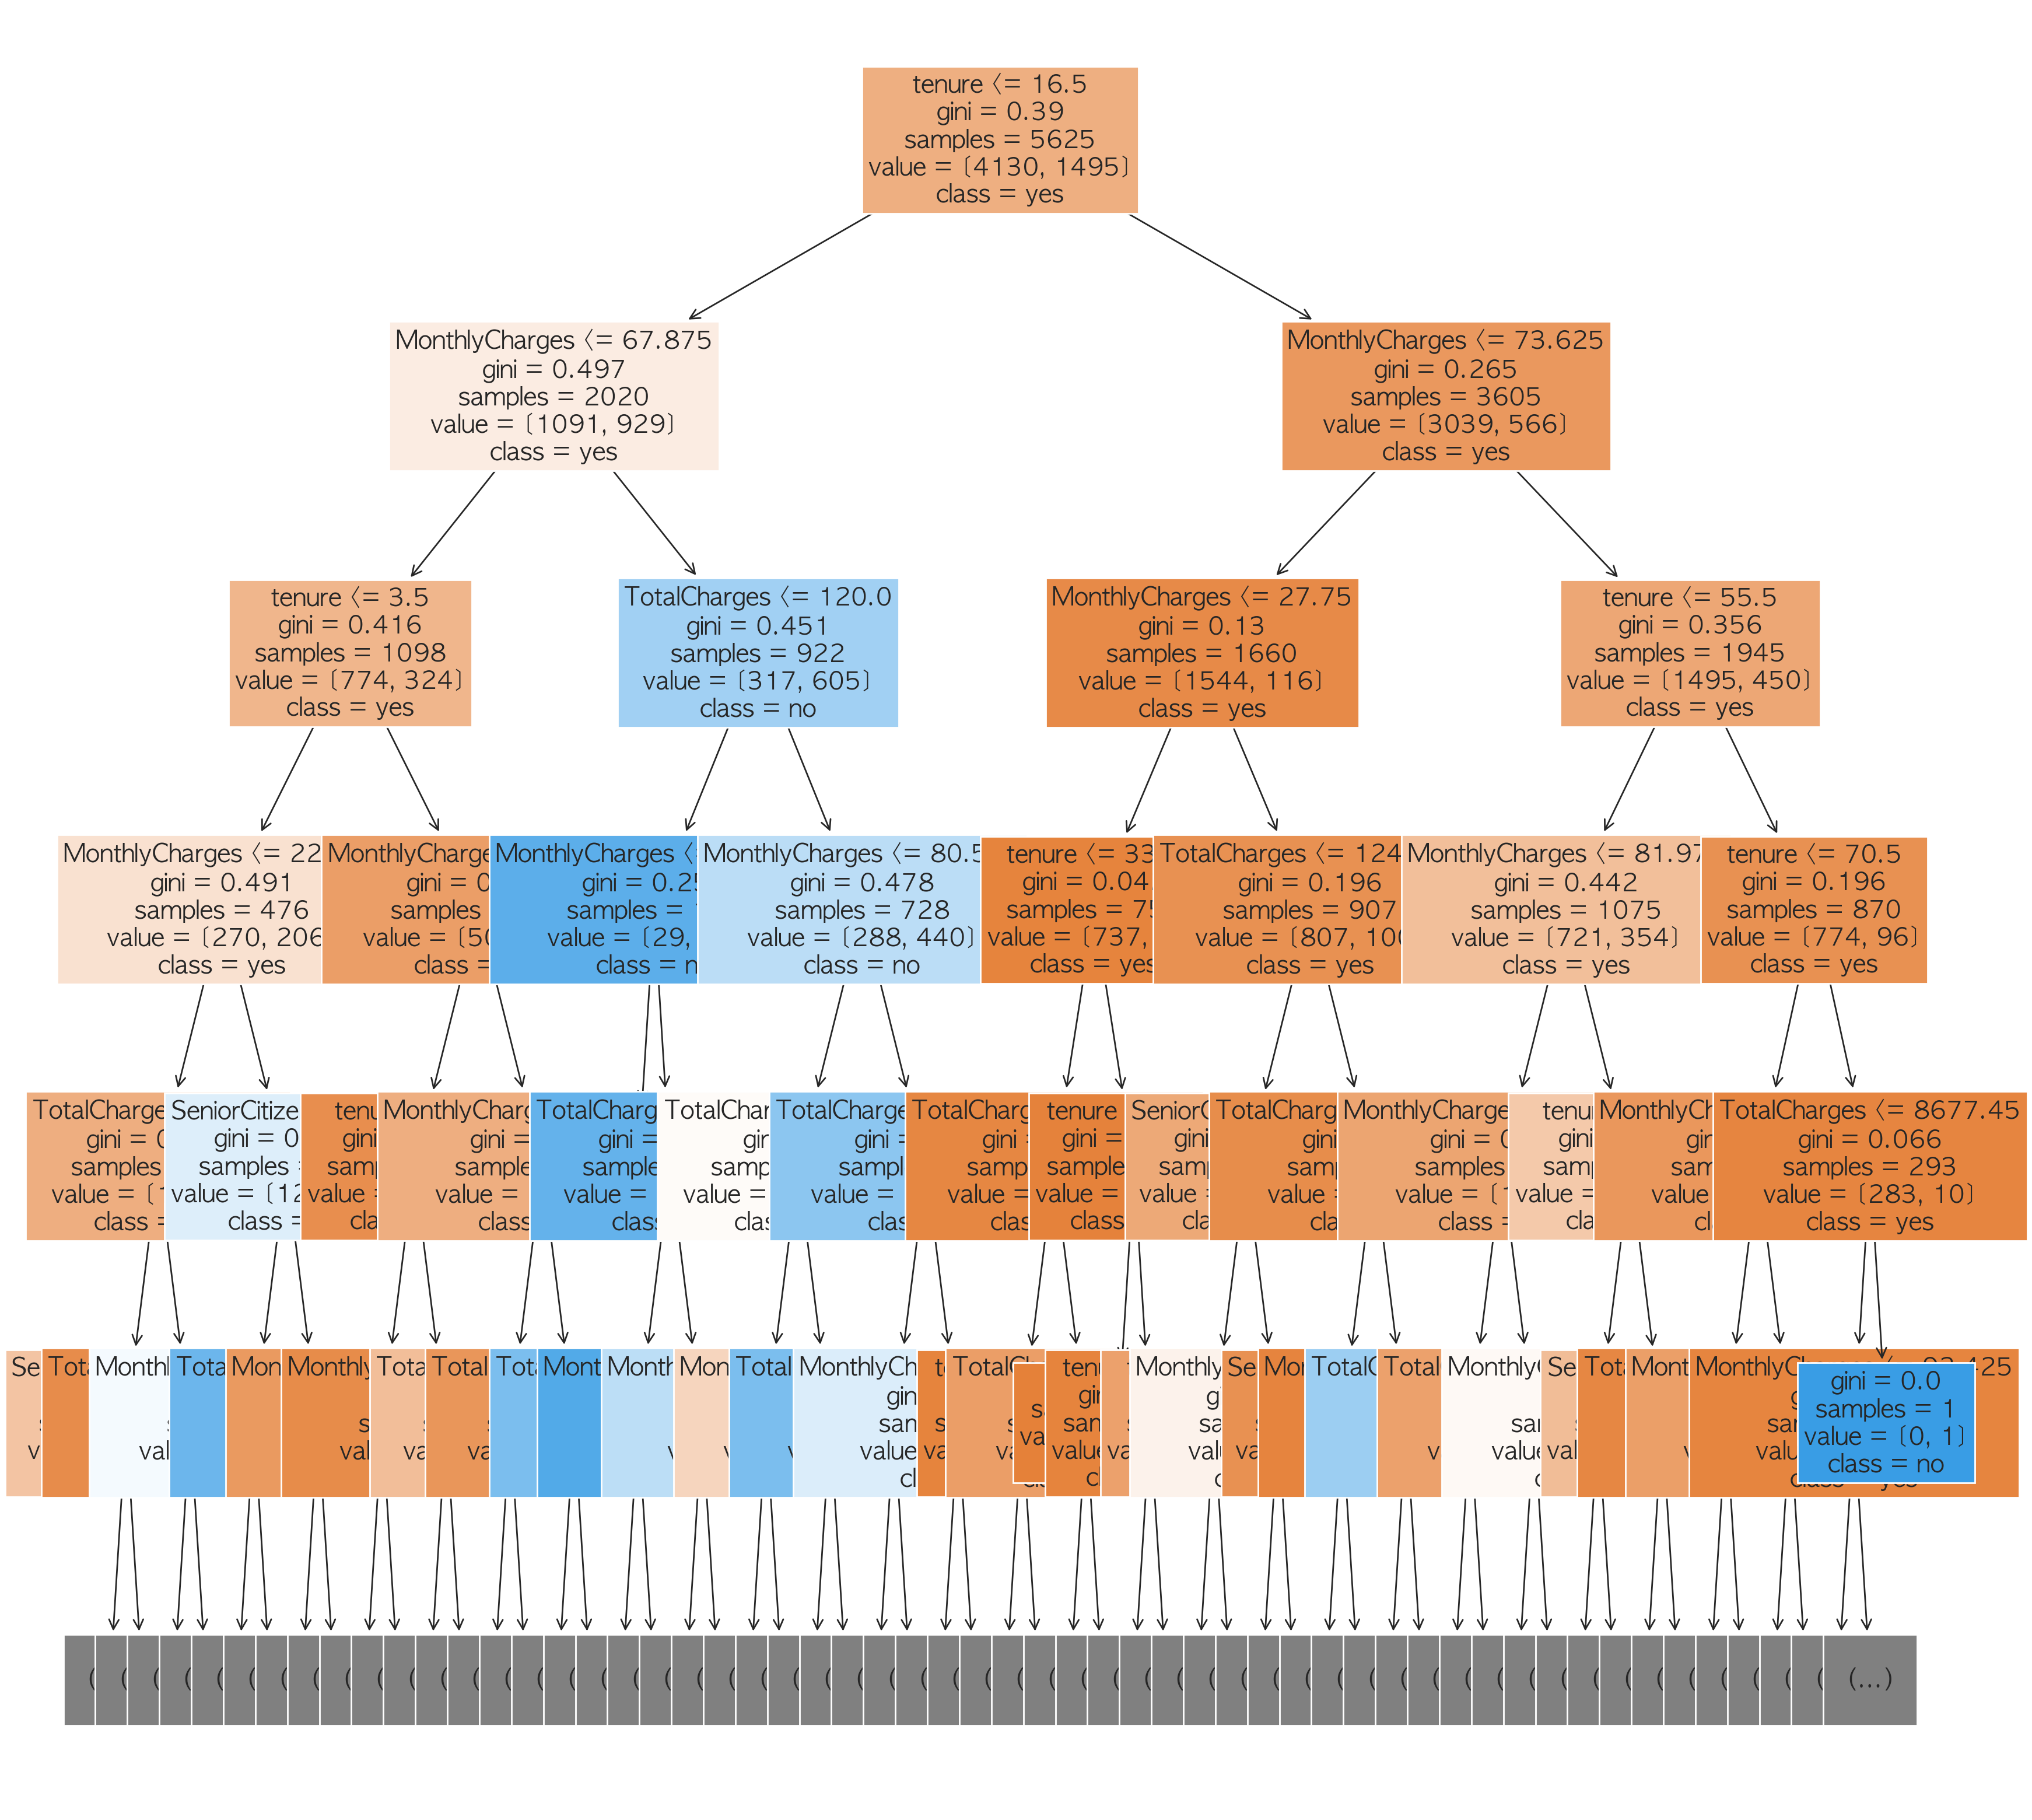

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(clf_decisiontree, filled=True, max_depth=5, fontsize=15,
         feature_names=feature_names, class_names=['yes', 'no']);

트리 시각화 방법2. graphviz

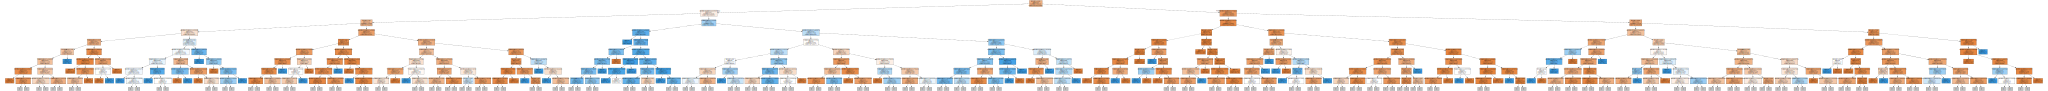

In [39]:
from sklearn.tree import export_graphviz
import graphviz

gv = export_graphviz(clf_decisiontree, filled=True, max_depth=8, 
                     feature_names=feature_names)
graphviz.Source(gv)

트리 시각화 방법3. text로 나타내기

In [40]:
from sklearn.tree import export_text

text_tree = export_text(clf_decisiontree, 
                        max_depth=5, feature_names=feature_names.to_list())
print(text_tree)

|--- tenure <= 16.50
|   |--- MonthlyCharges <= 67.88
|   |   |--- tenure <= 3.50
|   |   |   |--- MonthlyCharges <= 22.33
|   |   |   |   |--- TotalCharges <= 33.40
|   |   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |--- SeniorCitizen >  0.50
|   |   |   |   |   |   |--- class: Yes
|   |   |   |   |--- TotalCharges >  33.40
|   |   |   |   |   |--- TotalCharges <= 58.08
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- TotalCharges >  58.08
|   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- MonthlyCharges >  22.33
|   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |--- MonthlyCharges <= 57.12
|   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |--- MonthlyCharges >  57.12
|   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |--- SeniorCitizen >  0.50
|   |   |   |   |   |--- TotalCharges <= 45.17
|   

#### feature별 중요도 확인

In [41]:
clf_decisiontree.feature_importances_

array([0.02020967, 0.23657916, 0.39057972, 0.35263145])

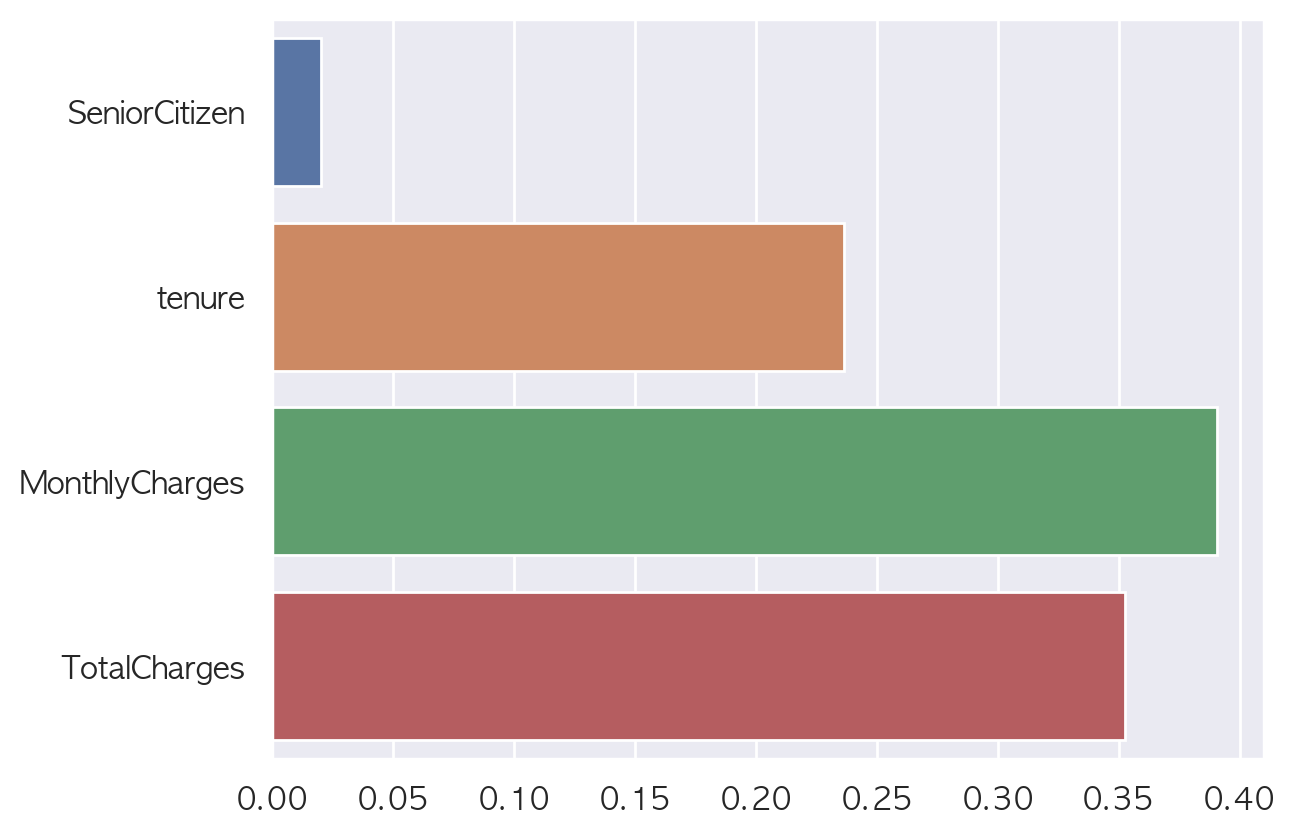

In [42]:
sns.barplot(x=clf_decisiontree.feature_importances_, y=feature_names);

### One-Hot-Encoding
one-hot : "한 번에 하나의 bit만 값(1, True)을 가진다."  
  
* 머신러닝에는 수치형 데이터만을 학습시킬 수 있음. > 범주형 컬럼을 수치형으로 변환해준다.
* 범주(category)값이 여러개면? > one-hot-encoding (순서가 있을 경우는 ordinal) 사용

범주형으로 되어있는 color 컬럼을
|index|color|
|-----|-----|
|0|red|
|1|blue|
|2|yellow|
|3|red|

color_red, color_blue, color_yellow로 나누고 0또는 1을 갖도록 컴럼을 분리
|index|color_red|color_blue|color_yellow|
|-----|---------|----------|------------|
|0|1|0|0|
|1|0|1|0|
|2|0|0|1|
|3|1|0|0|

In [29]:
print(df.shape)
print(df.columns)
df.head(3)

(7032, 20)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### 범주형컬럼 선택

In [48]:
# nunique값이 2인 컬럼만 binary_cols로 따로 저장
cols_nunique = df.drop(label_name, axis=1).nunique()
binary_cols = cols_nunique[cols_nunique==2].index
binary_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling'],
      dtype='object')

In [51]:
# binary_cols 중 SeniorCitizen은 이미 0, 1로 변환되어 있음.
df[binary_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes
5575-GNVDE,Male,0,No,No,Yes,No
3668-QPYBK,Male,0,No,No,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes


In [52]:
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] :
    col_bi = str(col) + '_bi'
    df[col_bi] = df[col] == 'Yes'

df['gender_bi'] = df['gender'] == 'Male'
df['SeniorCitien_bi'] = df['SeniorCitizen'] == 1

In [54]:
print(df.shape)
df.head(3)

(7032, 26)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_bi,Dependents_bi,PhoneService_bi,PaperlessBilling_bi,gender_bi,SeniorCitien_bi
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,No,True,False,False,True,False,False
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,No,False,False,True,False,True,False
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,False,False,True,True,True,False
